<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230918_multicolinearity/%E5%AE%8C%E5%85%A8%E3%81%AA%E5%A4%9A%E9%87%8D%E5%85%B1%E7%B7%9A%E6%80%A7%E3%81%8C%E3%81%82%E3%82%8B%E3%81%A8%E3%81%8D%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E4%BF%82%E6%95%B0%E3%81%AE%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [65]:
sample_size = 10

sigma1 = 4
x1 = sigma1 * np.random.randn(sample_size) + 1

In [66]:
coef = 2.0

x2 = x1 * coef

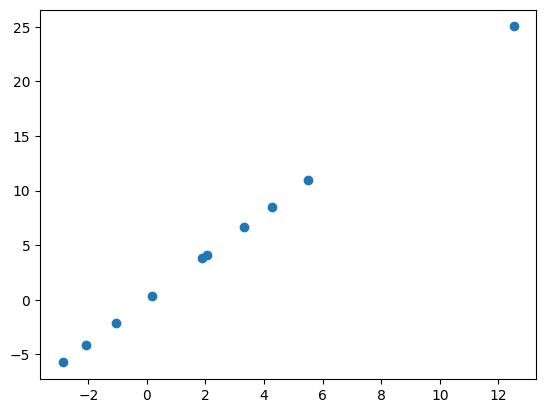

In [67]:
plt.scatter(x1, x2)

In [68]:
# design matrix
x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
x_mat

array([[ 1.        , -1.06902053, -2.13804107],
       [ 1.        , 12.51498366, 25.02996732],
       [ 1.        ,  5.49877924, 10.99755849],
       [ 1.        , -2.87496113, -5.74992225],
       [ 1.        ,  0.17493386,  0.34986771],
       [ 1.        ,  4.26558543,  8.53117085],
       [ 1.        ,  3.30865166,  6.61730332],
       [ 1.        ,  1.88787742,  3.77575483],
       [ 1.        , -2.0921829 , -4.1843658 ],
       [ 1.        ,  2.06509251,  4.13018502]])

In [69]:
# coefficients
beta = np.array([1, 1, 1])

# std of error term
sigma = 1.5

In [70]:
# Moore-Penrose Inverse
x_pinv = np.linalg.pinv(x_mat)

In [71]:
beta0 = x_pinv @ x_mat @ beta
beta0

array([1. , 0.6, 1.2])

# 係数の推定（最小二乗法）

In [72]:
eps_vec = np.random.randn(sample_size) * sigma
y = np.dot(x_mat, beta) + eps_vec
y

array([ 0.05691464, 42.50677795, 15.38533796, -7.93868252,  0.77341619,
       12.09563668, 12.0738153 ,  5.09624597, -3.46663067,  7.68414033])

In [73]:
# LSM (w=0)
beta_hat_0 = np.dot(x_pinv, y)

beta_hat_0

array([1.06864092, 0.6214643 , 1.2429286 ])

In [74]:
def plot_line(func, x_min, x_max, ax, **args):
  _x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
  _y = func(_x)

  return ax.plot(_x, _y, **args)

In [75]:
const = beta_hat_0[2] + 0.5 * beta_hat_0[1]
const

1.5536607459401388

Text(0, 0.5, '$\\hat{\\beta}_2$')

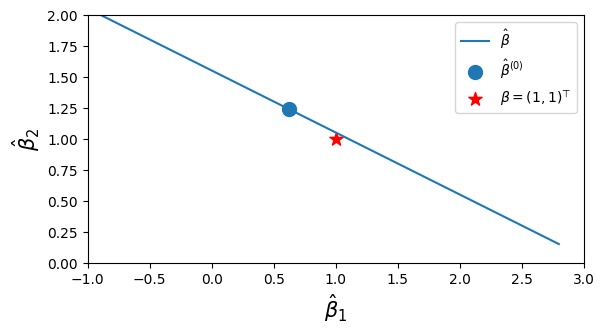

In [76]:
fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + const, x_min, x_max, ax, ls="-", label="$\\hat{\\beta}$")

ax.scatter(x=beta_hat_0[1], y=beta_hat_0[2], s=100, label="$\\hat{\\beta}^{(0)}$")

ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)^\\top$")

ax.legend()

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

# 複数回試行した結果

$\boldsymbol{X}$ は変えずに、誤差項 $\{ɛ_i\}_{i=1}^n$ を変えて推定を繰り返し、推定量の分布を見た。

In [77]:
n_iter = 1000
list_beta_hat = []

x_pinv = np.linalg.pinv(x_mat)

for i in range(0, n_iter):
  eps_vec = np.random.randn(sample_size) * sigma
  y = np.dot(x_mat, beta) + eps_vec
  beta_hat = np.dot(x_pinv, y)
  list_beta_hat.append(beta_hat)

beta_hat_samples = np.array(list_beta_hat)

In [78]:
beta_hat_samples.mean(0)

array([0.97133137, 0.60052972, 1.20105944])

In [79]:
band_width = sigma / np.sqrt(5 * ((x1 - x1.mean())**2).sum()) * norm.ppf(0.975)
ratio = band_width / np.linalg.norm(np.array([3/5, 6/5]))

c_threshold_lower = 1.5 * (1 - ratio)
c_threshold_upper = 1.5 * (1 + ratio)

(0.0, 2.0)

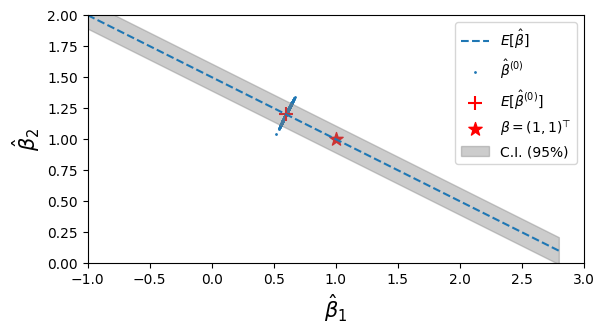

In [80]:
beta_hat_samples = np.array(list_beta_hat)
beta1_hat = beta_hat_samples[:, 1]
beta2_hat = beta_hat_samples[:, 2]

fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

x_min = -1.0
x_max = 3.0

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", label="$E[\\hat{\\beta}]$")

_x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
y_upper = -0.5*_x + c_threshold_upper
y_lower = -0.5*_x + c_threshold_lower

ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}^{(0)}$")
ax.scatter(beta0[1], beta0[2], color="red", s=100, marker="+", label="$E[\\hat{\\beta}^{(0)}]$")
ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)^\\top$")

ax.fill_between(_x, y_lower, y_upper, alpha=0.4, color="gray", label="C.I. (95%)")

ax.legend()

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min)*0.5)

In [81]:
(np.linalg.norm(beta_hat_samples[:, 1:] - beta0[1:], axis=1) > sigma  * norm.ppf(0.975) / np.sqrt(5 * ((x1 - x1.mean())**2).sum())).sum()

38